**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

In [2]:
# %%pycodestyle
from scipy.spatial.distance import cdist


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.y_tr = y
        self.x_tr = X
        self.n_class = np.max(y)+1

    def predict(self, X):
        if self.algorithm == "kd_tree":       
            tree = KDTree(self.x_tr)
            _, ind = tree.query(X, k=self.n_neighbors)
            classes = y_train[ind]

        elif self.algorithm == "brute":
            distanse = cdist(X, self.x_tr, metric='euclidean')
            classes = y_train[np.argsort(distanse)[:, :self.n_neighbors]]

        Y_pred = np.zeros(len(X), dtype=self.y_tr.dtype)

        for i in range(len(X)):
            Y_pred[i] = np.argmax(np.bincount(classes[i]))

        return Y_pred

    def predict_proba(self, X):
        if self.algorithm == "kd_tree":
            tree = KDTree(self.x_tr)
            distanse, ind = tree.query(X, k=self.n_neighbors)
            classes = y_train[ind]

        elif self.algorithm == "brute":
            distanse = cdist(X, self.x_tr, metric='euclidean')
            classes = y_train[np.argsort(distanse)[:, :self.n_neighbors]]

        Y_pred = np.zeros((len(X), self.n_class), dtype=np.float16)

        c = 0
        for i in classes:
            for j in i:
                Y_pred[c][j] += 1.0

            Y_pred[c] = Y_pred[c] / np.sum(Y_pred[c])

            c += 1

        return Y_pred

    def score(self, X, y):
        return (self.predict(X) == y).mean()

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 109 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.89 ms


array([1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 355 µs


array([1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.93 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.25 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float16)

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

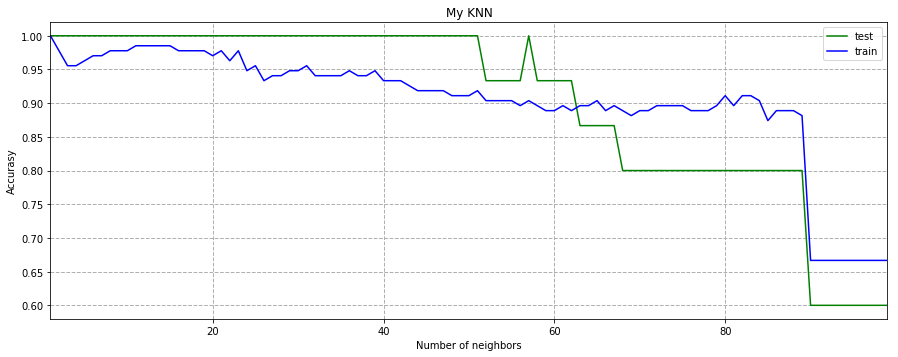

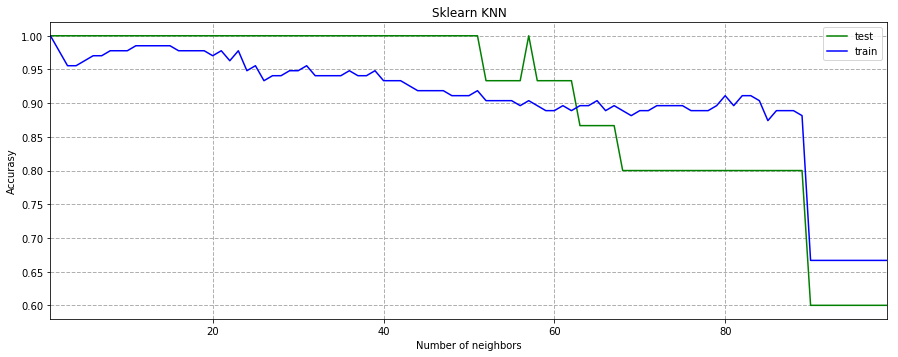

In [15]:
n_max = 100
test_n = 200
my_train_score = np.zeros(n_max-1)
my_test_score = np.zeros(n_max-1)
train_score = np.zeros(n_max-1)
test_score = np.zeros(n_max-1)
x_ax = np.arange(1, n_max)
X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target,
            test_size=0.1, stratify=iris.target
        )
for i in range(1, n_max):
    my_test = []
    my_train = []
    test = []
    train = []

    for j in range(test_n):
#make different train and test for better models
        
#my classifier
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        my_test.append(my_clf.score(X_test, y_test))
        my_train.append(my_clf.score(X_train, y_train))
# sklearn
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(X_train, y_train)
        test.append(clf.score(X_test, y_test))
        train.append(clf.score(X_train, y_train))
    
# my classifier
    my_train_score[i-1] = np.mean(my_train)
    my_test_score[i-1] = np.mean(my_test)
# sklearn
    train_score[i-1] = np.mean(my_train)
    test_score[i-1] = np.mean(my_test)

# plots
plt.figure(figsize=(15, 12))

# my classifier
plt.subplot(2, 1, 1)
plt.xlim(1, n_max-1)
plt.title("My KNN")
plt.plot(np.arange(1, n_max), my_test_score, label="test", color="green")
plt.plot(np.arange(1, n_max), my_train_score, label="train", color="blue")
plt.xlabel('Number of neighbors')
plt.ylabel('Accurasy')
plt.legend()
plt.grid(linestyle='--', linewidth=1)
plt.show()

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)
plt.xlim(1, n_max-1)
plt.title("Sklearn KNN")
plt.plot(np.arange(1, n_max), test_score, label="test", color="green")
plt.plot(np.arange(1, n_max), train_score, label="train", color="blue")
plt.xlabel('Number of neighbors')
plt.ylabel('Accurasy')
plt.legend()
plt.grid(linestyle='--', linewidth=1)
plt.show()

**MNIST**

In [32]:
mnist = fetch_mldata('MNIST original')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, mnist.target, test_size=0.01, stratify=mnist.target)

In [34]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [35]:
%time clf.fit(X_train, y_train)

CPU times: user 21.9 s, sys: 416 ms, total: 22.3 s
Wall time: 22.3 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 86.7 ms


In [37]:
%time clf.predict(X_test)

CPU times: user 49.7 s, sys: 136 ms, total: 49.9 s
Wall time: 49.9 s


array([1, 3, 5, 7, 5, 9, 0, 3, 6, 9, 8, 1, 7, 1, 8, 9, 2, 2, 9, 4, 0, 4,
       0, 5, 6, 6, 9, 8, 1, 6, 6, 6, 1, 1, 7, 2, 1, 4, 8, 0, 6, 4, 8, 9,
       1, 8, 5, 9, 7, 8, 2, 6, 4, 5, 1, 2, 3, 7, 0, 7, 1, 6, 2, 0, 8, 8,
       9, 1, 7, 1, 0, 8, 3, 1, 8, 7, 7, 1, 3, 4, 5, 9, 1, 0, 9, 0, 3, 5,
       9, 3, 4, 9, 4, 9, 7, 2, 9, 9, 5, 5, 7, 3, 0, 8, 5, 0, 7, 0, 2, 4,
       6, 6, 6, 3, 7, 4, 2, 6, 8, 4, 4, 0, 0, 1, 4, 1, 5, 3, 1, 4, 4, 6,
       2, 6, 5, 8, 6, 5, 1, 7, 6, 4, 1, 2, 9, 3, 1, 3, 3, 9, 0, 6, 3, 8,
       3, 4, 7, 0, 2, 0, 3, 7, 7, 1, 2, 6, 1, 6, 9, 3, 1, 5, 7, 6, 2, 5,
       0, 2, 8, 7, 3, 2, 6, 0, 2, 4, 5, 5, 8, 3, 4, 7, 4, 5, 1, 7, 6, 6,
       2, 5, 3, 9, 6, 6, 7, 3, 5, 1, 4, 3, 3, 2, 2, 9, 1, 8, 2, 3, 7, 2,
       7, 5, 5, 8, 4, 1, 4, 7, 4, 2, 3, 4, 9, 5, 9, 5, 0, 3, 2, 0, 5, 9,
       5, 8, 1, 8, 9, 8, 0, 2, 3, 2, 3, 3, 1, 5, 6, 5, 3, 6, 7, 8, 4, 6,
       5, 3, 0, 7, 9, 1, 1, 7, 1, 3, 6, 2, 3, 7, 5, 8, 4, 6, 4, 0, 0, 1,
       4, 9, 2, 7, 0, 5, 1, 5, 2, 3, 8, 9, 3, 7, 5,

In [38]:
%time my_clf.predict(X_test)

CPU times: user 30.3 s, sys: 1.08 s, total: 31.3 s
Wall time: 42.2 s


array([1, 3, 5, 7, 5, 9, 0, 3, 6, 9, 8, 1, 7, 1, 8, 9, 2, 2, 9, 4, 0, 4,
       0, 5, 6, 6, 9, 8, 1, 6, 6, 6, 1, 1, 7, 2, 1, 4, 8, 0, 6, 4, 8, 9,
       1, 8, 5, 9, 7, 8, 2, 6, 4, 5, 1, 2, 3, 7, 0, 7, 1, 6, 2, 0, 8, 8,
       9, 1, 7, 1, 0, 8, 3, 1, 8, 7, 7, 1, 3, 4, 5, 9, 1, 0, 9, 0, 3, 5,
       9, 3, 4, 9, 4, 9, 7, 2, 9, 9, 5, 5, 7, 3, 0, 8, 5, 0, 7, 0, 2, 4,
       6, 6, 6, 3, 7, 4, 2, 6, 8, 4, 4, 0, 0, 1, 4, 1, 5, 3, 1, 4, 4, 6,
       2, 6, 5, 8, 6, 5, 1, 7, 6, 4, 1, 2, 9, 3, 1, 3, 3, 9, 0, 6, 3, 8,
       3, 4, 7, 0, 2, 0, 3, 7, 7, 1, 2, 6, 1, 6, 9, 3, 1, 5, 7, 6, 2, 5,
       0, 2, 8, 7, 3, 2, 6, 0, 2, 4, 5, 5, 8, 3, 4, 7, 4, 5, 1, 7, 6, 6,
       2, 5, 3, 9, 6, 6, 7, 3, 5, 1, 4, 3, 3, 2, 2, 9, 1, 8, 2, 3, 7, 2,
       7, 5, 5, 8, 4, 1, 4, 7, 4, 2, 3, 4, 9, 5, 9, 5, 0, 3, 2, 0, 5, 9,
       5, 8, 1, 8, 9, 8, 0, 2, 3, 2, 3, 3, 1, 5, 6, 5, 3, 6, 7, 8, 4, 6,
       5, 3, 0, 7, 9, 1, 1, 7, 1, 3, 6, 2, 3, 7, 5, 8, 4, 6, 4, 0, 0, 1,
       4, 9, 2, 7, 0, 5, 1, 5, 2, 3, 8, 9, 3, 7, 5,

In [39]:
%time clf.predict_proba(X_test)

CPU times: user 52.1 s, sys: 120 ms, total: 52.3 s
Wall time: 54.1 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [40]:
%time my_clf.predict_proba(X_test)

CPU times: user 32.7 s, sys: 488 ms, total: 33.1 s
Wall time: 33.2 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float16)

In [41]:
clf.score(X_test, y_test)

0.9716666666666667

In [42]:
my_clf.score(X_test, y_test)

0.9716666666666667

Задание 4

In [67]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [60]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [45]:
%time clf.fit(X_train, y_train)

CPU times: user 22.3 s, sys: 112 ms, total: 22.4 s
Wall time: 22.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [68]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 98.5 ms


In [47]:
%time clf.predict(X_test)

CPU times: user 52.3 s, sys: 4 ms, total: 52.3 s
Wall time: 52.3 s


array([1, 9, 3, 8, 7, 8, 2, 3, 0, 4, 2, 5, 0, 3, 6, 6, 4, 9, 2, 3, 5, 9,
       5, 5, 5, 9, 4, 6, 9, 9, 1, 8, 3, 4, 2, 8, 0, 2, 4, 7, 3, 1, 4, 7,
       4, 7, 7, 1, 1, 7, 2, 7, 3, 7, 4, 1, 9, 7, 1, 3, 1, 6, 3, 7, 6, 5,
       6, 4, 8, 3, 7, 4, 5, 4, 0, 8, 1, 1, 0, 6, 5, 2, 1, 1, 0, 1, 9, 6,
       4, 4, 2, 3, 8, 1, 4, 0, 6, 0, 2, 2, 9, 8, 7, 3, 1, 0, 6, 9, 8, 3,
       1, 7, 1, 2, 8, 3, 5, 0, 0, 2, 0, 7, 7, 6, 2, 9, 0, 3, 1, 4, 7, 0,
       9, 8, 5, 7, 3, 2, 9, 7, 7, 2, 6, 3, 1, 2, 5, 3, 3, 8, 4, 8, 3, 2,
       1, 3, 6, 8, 3, 9, 5, 7, 0, 7, 0, 9, 7, 6, 3, 3, 0, 2, 4, 1, 3, 6,
       9, 8, 0, 3, 5, 9, 4, 4, 9, 9, 5, 7, 4, 3, 0, 0, 4, 0, 4, 4, 9, 2,
       1, 0, 7, 9, 0, 0, 4, 2, 0, 9, 1, 2, 7, 0, 6, 4, 5, 4, 1, 2, 7, 8,
       8, 7, 0, 0, 3, 0, 0, 8, 4, 1, 1, 2, 5, 8, 1, 8, 8, 6, 4, 6, 1, 6,
       1, 7, 9, 5, 0, 4, 1, 6, 6, 9, 0, 8, 0, 1, 7, 1, 3, 5, 6, 6, 2, 1,
       4, 1, 4, 2, 1, 9, 8, 1, 5, 0, 7, 2, 2, 3, 7, 3, 4, 0, 7, 3, 7, 1,
       8, 8, 6, 5, 0, 6, 4, 7, 1, 3, 3, 2, 2, 9, 6,

In [69]:
%time my_clf.predict(X_test)

CPU times: user 1min 8s, sys: 360 ms, total: 1min 9s
Wall time: 1min 9s


array([1, 9, 3, 8, 7, 8, 2, 3, 0, 4, 2, 5, 0, 3, 6, 6, 4, 9, 2, 3, 5, 9,
       5, 5, 5, 9, 4, 6, 9, 9, 1, 8, 3, 4, 2, 8, 0, 2, 4, 7, 3, 1, 4, 7,
       4, 7, 7, 1, 1, 7, 2, 7, 3, 7, 4, 1, 9, 7, 1, 3, 1, 6, 3, 7, 6, 5,
       6, 4, 8, 3, 7, 4, 5, 4, 0, 8, 1, 1, 0, 6, 5, 2, 1, 1, 0, 1, 9, 6,
       4, 4, 2, 3, 8, 1, 4, 0, 6, 0, 2, 2, 9, 8, 7, 3, 1, 0, 6, 9, 8, 3,
       1, 7, 1, 2, 8, 3, 5, 0, 0, 2, 0, 7, 7, 6, 2, 9, 0, 3, 1, 4, 7, 0,
       9, 8, 5, 7, 3, 2, 9, 7, 7, 2, 6, 3, 1, 2, 5, 3, 3, 8, 4, 8, 3, 2,
       1, 3, 6, 8, 3, 9, 5, 7, 0, 7, 0, 9, 7, 6, 3, 3, 0, 2, 4, 1, 3, 6,
       9, 8, 0, 3, 5, 9, 4, 4, 9, 9, 5, 7, 4, 3, 0, 0, 4, 0, 4, 4, 9, 2,
       1, 0, 7, 9, 0, 0, 4, 2, 0, 9, 1, 2, 7, 0, 6, 4, 5, 4, 1, 2, 7, 8,
       8, 7, 0, 0, 3, 0, 0, 8, 4, 1, 1, 2, 5, 8, 1, 8, 8, 6, 4, 6, 1, 6,
       1, 7, 9, 5, 0, 4, 1, 6, 6, 9, 0, 8, 0, 1, 7, 1, 3, 5, 6, 6, 2, 1,
       4, 1, 4, 2, 1, 9, 8, 1, 5, 0, 7, 2, 2, 3, 7, 3, 4, 0, 7, 3, 7, 1,
       8, 8, 6, 5, 0, 6, 4, 7, 1, 3, 3, 2, 2, 9, 6,

In [49]:
%time clf.predict_proba(X_test)

CPU times: user 53 s, sys: 4 ms, total: 53 s
Wall time: 53 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 10s, sys: 244 ms, total: 1min 10s
Wall time: 1min 10s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [51]:
clf.score(X_test, y_test)

0.9766666666666667

In [71]:
my_clf.score(X_test, y_test)

0.9766666666666667

Задание 5

In [ ]:
# seaborn  - визуализация данных
# matplotlib - визуализация данных
# train_test_split - разделение даннах на трейн и тест(на трейне будет обучение, на тесте будет оценка)
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - позволяет создавать очереди выполнения функций(как конвеер)
# StandardScaler (from sklearn.preprocessing import StandardScaler) нормализует данные к диапазону [-1,1]
# ClassifierMixin позволяет объединять предсказания разных моделей
# NeighborsBase основана на методе ближайших соседей
# KNeighborsMixin позволяет совмещать разные модели kneghbors
# SupervisedIntegerMixin выполняет работу по проверке типов, а затем вызывает метод fit  NeighborsBase